# Inaugural Project

Importing and setting magics:

In [2]:
# Importing packages 
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

# Autoreload modules when code is run 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Setting plot style 
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Question 1

The Edgeworth economy is an exchange economy with two consumers. Typically, there are two goods to consume, $x_1$ and $x_2$, and each consumer has an initial endowment which we will label $(\omega_{1A}, \omega_{2A})$ and $(\omega_{1B}, \omega_{2B})$. However, the consumers have preferences for each good, in they will exchange goods in accordance with these. In this problem set, we will model the following Cobb-Douglas preferences for consumer A and B:
$$
u_A(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha} \wedge u_B(x_1,x_2) = x_1^{\beta}x_2^{1-\beta} 
$$

A typical tool used in the context of an edgeworth economy is the edgeworth box. Itis a graphical tool to visualize the different allocations of goods. The dimensions of the box correspond to the total endowments of the two commodities, and each point inside the box represents a possible allocation

We will illustrate the following set in an Edgeworth box. 
$$
C = \left\{ (x_1^A, x_2^A) \, \Bigg| \, 
\begin{array}{c}
u^A(x_1^A, x_2^A) \geq u^A(\omega_1^A, \omega_2^A) \\[1em]
u^B(x_1^B, x_2^B) \geq u^B(\omega_1^B, \omega_2^B) \\[1em]
x_1^B = 1 - x_1^A, \, x_2^B = 1 - x_2^A \\[1em]
x_1^A, x_2^A \in \left\{0, \frac{1}{N}, \frac{2}{N}, \ldots, 1\right\}, \, N = 75
\end{array}
\right\}
$$

In [3]:
# Importing class from py-file
from inauguralproject import ExchangeEconomyClass

Deriving A and B's utility of their initial bundles and creating a set containing all combinations of goods which lead to Pareto improvements: 

In [4]:
# code for solving the model 
#import module
economy = ExchangeEconomyClass()

#set parameters as in the py-file
par = economy.par

#determine utility of initial endowment
# a. consumer A
utility_init_A = economy.utility_A(economy.par.w1A, economy.par.w2A) #calling utility function in py-file
print(f"The utility of the bundle (x1A = {par.w1A}, x2A = {par.w2A}) is: {utility_init_A:.3f}")

# b. consumer B
utility_init_B = economy.utility_B(economy.par.w1B,economy.par.w2B) #calling utility function in py-file
print(f"The utility of the bundle (x1B = {par.w1B:.1f}, x2B = {par.w2B}) is: {utility_init_B:.3f}")

#create grid for x1a and x2a
N = 75
x1A_val = np.linspace(0,1,N)
x2A_val = np.linspace(0,1,N)

#create a set C
C = []

#loop through grid and append pareto optimal values to C
for x1A in x1A_val:
    for x2A in x2A_val:
        # a. calculate the corresponding consume for B that follows from walras' law:
        x1B = 1-x1A
        x2B = 1-x2A
        # b. calculate utility at every point
        utility_A=economy.utility_A(x1A,x2A)
        utility_B=economy.utility_B(x1B,x2B)
        # c. check if value is pareto
        if utility_A >= utility_init_A and utility_B >= utility_init_B:
            # d. append to C if condition is satisfied
            C.append((x1A,x2A))

The utility of the bundle (x1A = 0.8, x2A = 0.3) is: 0.416
The utility of the bundle (x1B = 0.2, x2B = 0.7) is: 0.304


Plotting the set of consumption bundles which lead to Pareto improvements in an Edgeworth box: 

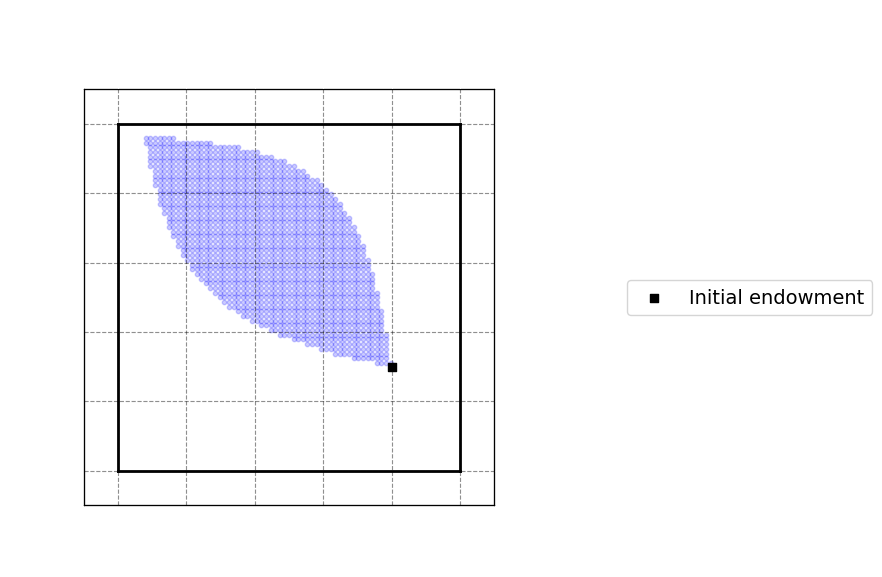

In [25]:
# Plotting the Edgeworth box
C = np.array(C)

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel("$x_1^A$", color="white")
ax1.set_ylabel("$x_2^A$", color="white")

temp = ax1.twinx()
temp.set_ylabel("$x_2^B$", color="white")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$", color="white")

# a. plot the pareto set
ax1.scatter(C[:, 0], C[:, 1], s=10, alpha=0.2, color='blue') 

# Initial endowments
ax1.scatter(par.w1A, par.w2A, marker="s", color="black", label="Initial endowment")

# c. create title
plt.title('Pareto optimal points', color="white")

# d. enable grid for primary axes 
ax1.grid(True)
plt.tight_layout()

# e. limits
ax1.plot([0,w1bar],[0,0],lw=2,color='black')
ax1.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax1.plot([0,0],[0,w2bar],lw=2,color='black')
ax1.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax1.set_xlim([-0.1, w1bar + 0.1])
ax1.set_ylim([-0.1, w2bar + 0.1])    
ax2.set_xlim([w1bar + 0.1, -0.1])
ax2.set_ylim([w2bar + 0.1, -0.1])

# f. add legend
ax1.legend(frameon=True, loc='center left', bbox_to_anchor=(1.3, 0.5))

# g. set tick parameter
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')
temp.tick_params(axis='y', colors='white')

plt.show()

# Question 2 and 3

To close in on an efficient allocation, we calculate the error in th market clearing condition s for $p_1 ∈ P_1 = {0.5,0.5+2\cdot \frac{1}{N} ,0.5+ 2\cdot\frac{2}{N} ,...,2.5}$, i.e.
$$ 
\epsilon_1(p,\omega) = x^{A⋆}_1 (p,\omega^A) −\omega^A_1 + x^{B⋆}_1 (p,\omega^B) −\omega^B_1
\epsilon_2(p,\omega) = x^{A⋆}_2 (p,\omega^A) −\omega^A_2 + x^{B⋆}_2 (p,\omega^B) −\omega^B_2
$$

In [29]:
# Define the price set with an increment of 2*1/N
# a. Define P1
P1 = np.arange(0.5, 2.5+ (1/(N)*2), 1/(N)*2)

# b. check the price set is defined correctly
#print(P1)

# Find the market errors
# a. loop over prices in price set using a for-loop
for p1 in P1[-5:]:
    # a. call the market clearing in the py-file
    epsilon_1, epsilon_2 = economy.check_market_clearing(p1)
    # b. print the last five results
    print((f'For p1 = {p1:.3f} the errors are: epsilon 1 = {epsilon_1:.3f}, epsilon 2 = {epsilon_2: .3f}'))    

For p1 = 2.393 the errors are: epsilon 1 = -0.363, epsilon 2 =  0.869
For p1 = 2.420 the errors are: epsilon 1 = -0.366, epsilon 2 =  0.885
For p1 = 2.447 the errors are: epsilon 1 = -0.368, epsilon 2 =  0.901
For p1 = 2.473 the errors are: epsilon 1 = -0.371, epsilon 2 =  0.917
For p1 = 2.500 the errors are: epsilon 1 = -0.373, epsilon 2 =  0.933


In [7]:
# Find market clearing prices
# a. set initial guess
init_guess = 2.5
# b. call the walras equilibrium function in the py-file
instance = economy.walras(init_guess, eps=1e-8, maxiter=500)

print(f'At the price p1 = {instance:.3f}, the market for both goods clear under the conditon that p2 is numeraire')

  0: p1 =   2.12666667 -> excess demand ->    -0.37333333
  1: p1 =   1.79312435 -> excess demand ->    -0.33354232
  2: p1 =   1.50914630 -> excess demand ->    -0.28397804
  3: p1 =   1.28463453 -> excess demand ->    -0.22451178
  4: p1 =   1.12574572 -> excess demand ->    -0.15888881
   ...
 22: p1 =   0.94444445 -> excess demand ->    -0.00000001
At the price p1 = 0.944, the market for both goods clear, under the conditon that p2 is numeraire


To visualize this result, we construct a plot that shows to convergence to the walras equilibrium

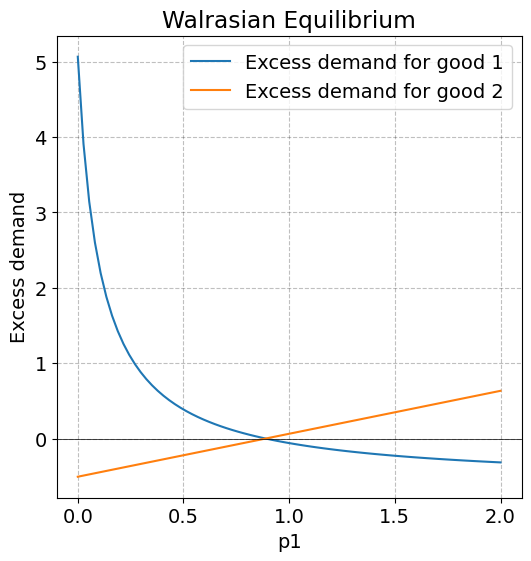

In [8]:
# Make plot of convergence to equilibrium
# a. create empty list to store the errors
excess_demands = []

# b. create a price range
price_range = np.linspace(0.1,2,N)

# c. loop over the price range
for p1 in price_range:
    excess_demand = economy.check_market_clearing(p1)
    excess_demands.append(excess_demand)

# d. convert to numpy array
excess_demands = np.array(excess_demands)

# Plot the figure
plt.figure(figsize=(6, 6))

# Plot excess demand for good 1
plt.plot(np.linspace(0,2,N), excess_demands[:, 0], label='Excess demand for good 1')

# Plot excess demand for good 2
plt.plot(np.linspace(0,2,N), excess_demands[:, 1],label='Excess demand for good 2')

# Add a horizontal line at zero to indicate market clearing
plt.axhline(0, color='black', linewidth=0.5)

plt.title('Walrasian Equilibrium')
plt.xlabel('p1')
plt.ylabel('Excess demand')
plt.legend()
plt.grid(True)
plt.show()

# Question 4a

In the following problems, we will assume that A chooses the price to maximize her own utility, and that B follows along. First, we assume that only prices within the already defined price set $P_1$ are allowed, i.e.
$$
\max_{p_1 \in P_1} u^A\left(1 −x^B_1 (p,\omega^B),1 −x^B_2 (p,\omega^B)\right)
$$

In [32]:
# Find the optimal price and allocation
# a. Define empty function to replace with the found solution.
optimal_price = ()
optimal_allocation = ()
max_utility = float("-inf")

# b. Loop over all prices in the price vector 
for p1 in P1:

# i. Call on demand function for B
    x1B, x2B = economy.demand_B(p1)

# ii. Make sure that the amount of each good left for A is positive 
    if 1-x1B > 0 and 1-x2B > 0:
        utility_A = economy.utility_A(1-x1B, 1-x2B)
        if utility_A > max_utility:
            max_utility = utility_A
            optimal_price = p1
            optimal_allocation = (1-x1B, 1-x2B)

# c. Print the solution
print(f"The optimal price is {optimal_price:.3f}, and the optimal allocation for A is x1 = {optimal_allocation[0]:.3f} and x2 = {optimal_allocation[1]:.3f}.")
print(f"Resulting in utility {max_utility:.3f} for A.")

The optimal price is 1.887, and the optimal allocation for A is x1 = 0.619 and x2 = 0.641.
Resulting in utility 0.634 for A.


# Question 4b

We now allow for any positive price to be chosen, i.e.
$$
\max_{p_1 \in R^+} u^A\left(1 −x^B_1 (\mathbf{p},\mathbf{\omega^B}),1 −x^B_2 (\mathbf{p},\mathbf{\omega^B})\right)
$$
When the price can be all positive numbers, we find the optimal price by minimizing the negative utility of A.

In [34]:
# Find the optimal price and allocation using scipy

# a. Define the utility function for A
def uA(p1):
    x1B, x2B = economy.demand_B(p1)
    return economy.utility_A(1-x1B, 1-x2B)

# b. Define the constraint
new_price = [1]
obj_func = lambda p1: -uA(p1)
constraint = lambda p1: economy.utility_B(1-x1B, 1-x2B)
constraints = {'type': 'ineq', 'fun': constraint}

#c. call optimizer 
res = optimize.minimize(obj_func, new_price ,method='SLSQP', constraints=constraints)
p1_best_scipy=res.x[0]
ua_best_scipy=-res.fun
opt_best_scipy=(1-x1B, 1-x2B)

# d. print the solution
print(f"The optimal price is {p1_best_scipy:.3f}, and the optimal allocation for A is x1 = {opt_best_scipy[0]:.3f} and x2 = {opt_best_scipy[1]:.3f}.")
print(f"The resulting utility for A is given by {ua_best_scipy:.3f}.")

The optimal price is 1.897, and the optimal allocation for A is x1 = 0.680 and x2 = 0.600.
The resulting utility for A is given by 0.634.


# Questions 5a and 5b

In [11]:
#5a. 
max_utility_A = -np.inf 
best_allocation_A = None

# Loop through all points in the set C
for allocation in C:
    # a. set current utility for A as utility of endowment 
    current_utility_A = economy.utility_A(par.w1A, par.w2A)
    if current_utility_A > max_utility_A:
        max_utility_A = current_utility_A
        best_allocation_A = allocation
a1 = best_allocation_A[0]
a2 = best_allocation_A[1]
print(f'Looping through the set C, the utility is maximised for agent A when x1 = {a1:.3f} and x2 = {a2:.3f} with u = {economy.utility_A(a1,a2):.3f}')

Looping through the set C, the utility is maximised for agent A when x1 = 0.081 and x2 = 0.946 with u = 0.417


In [12]:
#find allocation if choice set is unrestricted, but B must not be worse off than with initial endowment
consumer = ExchangeEconomyClass()
consumer.solve()
print(f'x1 = {consumer.sol.x1:.3f}, x2 = {consumer.sol.x2:.3f}, u = {consumer.utility_A(consumer.sol.x1,consumer.sol.x2):3f}')


x1 = 0.576, x2 = 0.844, u = 0.743228


# Question 6a and 6b

In [13]:
opt = ExchangeEconomyClass()
opt.solve2()
print(f'the optimal value of x1 = {opt.sol.x1:.3f}, and x2 = {opt.sol.x2:.3f}, at which the utility is u = {opt.sol.u:.3f}')

the optimal value of x1 = 0.333, and x2 = 0.667, at which the utility is u = 0.529


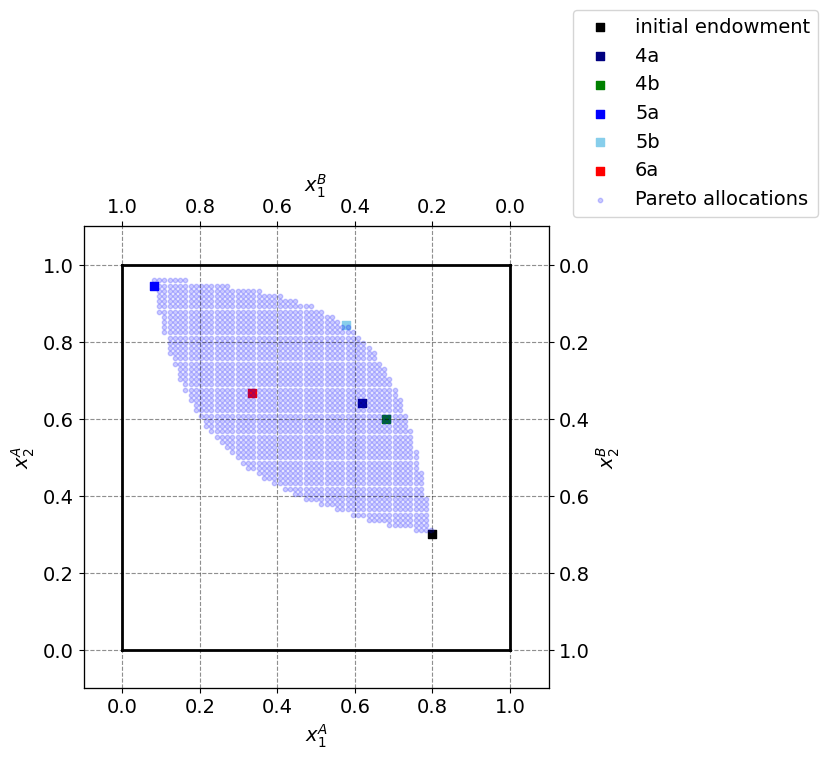

In [14]:

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")


# A
# a. initial endowment
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='initial endowment')

# b. 4a
ax_A.scatter(optimal_allocation[0], optimal_allocation[1], marker='s',color='navy',label='4a')

# c. 4b 
ax_A.scatter(opt_best_scipy[0], opt_best_scipy[1] ,marker='s',color='green',label='4b')

# d. 5a 
ax_A.scatter(a1, a2 ,marker='s',color='blue',label='5a')

# e. 5b
ax_A.scatter(consumer.sol.x1,consumer.sol.x2,marker='s',color='skyblue',label='5b')

# f. 6a
ax_A.scatter(opt.sol.x1,opt.sol.x2 ,marker='s',color='red',label='6a')

# Possible allocations
ax_A.scatter(C[:, 0], C[:, 1], s=10, color='blue', alpha=0.2, label='Pareto allocations')



# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='lower right',bbox_to_anchor=(1.6,1.0));

# Question 7

In [15]:
np.random.seed(2000)
#w1a_uni=np.random.uniform(low=0,high=1,size=50)
#w2a_uni=np.random.uniform(low=0,high=1,size=50)

# Generate 50 pairs of numbers
W_pairs = []
for _ in range(50):
    pair = (np.random.uniform(0, 1), np.random.uniform(0, 1))
    W_pairs.append(pair)

print(W_pairs)


[(0.570517285378466, 0.56452875520484), (0.48844183254450535, 0.3364777534653247), (0.3758681778119588, 0.532035868838685), (0.06810628846711264, 0.5845290601966381), (0.23789776342109814, 0.16075658153974937), (0.15211914914792302, 0.12706921895137258), (0.3274411663720117, 0.6941538730112569), (0.358966469406951, 0.8913656558995818), (0.2018798794246912, 0.11060250345361267), (0.5275567612904862, 0.8676553290111667), (0.2618743783611466, 0.4993951212412697), (0.42856440131602347, 0.5300038886795768), (0.5739468217974663, 0.3918556500474658), (0.07951411536207031, 0.8672810103716965), (0.16450358011567312, 0.8034816208777167), (0.28792824821028573, 0.2685711770720025), (0.7174780154703791, 0.8814056557487058), (0.9921200295448002, 0.4583500369122594), (0.7851292707718505, 0.7386939356252453), (0.47358297821611806, 0.48483470503794013), (0.9330050981122372, 0.7526538389399142), (0.1592888282095748, 0.13481046507080274), (0.4106771736908399, 0.7565362622325277), (0.212513021995953, 0.31

# Question 8

  0: p1 =   2.08544293 -> excess demand ->    -0.41455707
  1: p1 =   1.72295533 -> excess demand ->    -0.36248760
  2: p1 =   1.42653067 -> excess demand ->    -0.29642465
  3: p1 =   1.20908224 -> excess demand ->    -0.21744844
  4: p1 =   1.07419129 -> excess demand ->    -0.13489095
   ...
 19: p1 =   0.96799483 -> excess demand ->    -0.00000001
  0: p1 =   0.86210596 -> excess demand ->    -0.10588887
  1: p1 =   0.82966249 -> excess demand ->    -0.03244347
  2: p1 =   0.82347409 -> excess demand ->    -0.00618840
  3: p1 =   0.82252863 -> excess demand ->    -0.00094546
  4: p1 =   0.82239113 -> excess demand ->    -0.00013750
   ...
  9: p1 =   0.82236796 -> excess demand ->    -0.00000001
  0: p1 =   0.86410966 -> excess demand ->     0.04174171
  1: p1 =   0.86802200 -> excess demand ->     0.00391234
  2: p1 =   0.86857518 -> excess demand ->     0.00055318
  3: p1 =   0.86865584 -> excess demand ->     0.00008066
  4: p1 =   0.86866765 -> excess demand ->     0.00001181


(1.1, -0.1)

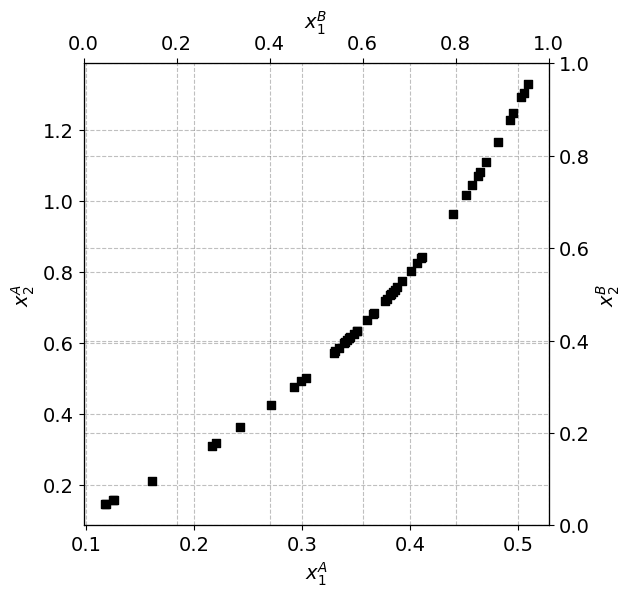

In [16]:
sol_entire=[]
sol_allocation=[]


for i in range(50):
    w1A, w2A = W_pairs[i]
    economy.par.w1A=w1A
    economy.par.w2A=w2A
    p1 = economy.walras(p1, eps=1e-8, maxiter=500)
    x1a, x2a = economy.demand_A(p1)
    sol_entire.append((w1A, w2A, p1, x1a, x2a))
    sol_allocation.append((x1a, x2a))
    i+=1

print(sol_entire)

# Plotting the results
sol_allocation = np.array(sol_allocation)

# Figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel("$x_1^A$")
ax1.set_ylabel("$x_2^A$")

temp = ax1.twinx()
temp.set_ylabel("$x_2^B$")
ax2 = temp.twiny()
ax2.set_xlabel("$x_1^B$")

# Allocations from W
ax1.scatter(sol_allocation[:, 0], sol_allocation[:, 1], marker='s',color='black',label='Initial endowment')

# Limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])



In [17]:
# Change values of endowments back to inital values
economy.par.w1A=0.8
economy.par.w2A=0.3

ADD CONCISE CONLUSION.